In [1]:
from scipy import *
import sys, time

from pybrain.rl.environments.mazes import Maze, MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, SARSA
from pybrain.rl.experiments import Experiment
from pybrain.rl.environments import Task
import pylab
pylab.gray()
pylab.ion()

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [65]:
structure = array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [1, 0, 0, 1, 0, 0, 0, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 1, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [66]:
environment = Maze(structure, (7, 7))

controller = ActionValueTable(81, 4)
controller.initialize(1.)
 
learner = Q()
agent = LearningAgent(controller, learner)
task = MDPMazeTask(environment)

experiment = Experiment(task, agent)


In [67]:
print environment

#########
#      *#
####### #
#     # #
# @# ## #
#  #  # #
#  #  # #
#  #    #
#########



In [68]:
while True:
    experiment.doInteractions(100)
    agent.learn()
    agent.reset()

KeyboardInterrupt: 

In [53]:
controller.params.reshape(81,4).max(1).reshape(9,9).round()

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  3.,  1.,  9.,  9.,  9.,  9.,  1.],
       [ 1.,  2.,  6.,  1.,  9.,  9.,  1.,  9.,  1.],
       [ 1.,  5.,  7.,  1.,  9.,  7.,  1.,  9.,  1.],
       [ 1.,  7.,  8.,  1.,  9.,  1.,  1.,  9.,  1.],
       [ 1.,  8.,  8.,  8.,  9.,  8.,  1.,  9.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  9.,  1.],
       [ 1.,  4.,  5.,  6.,  6.,  7.,  8.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

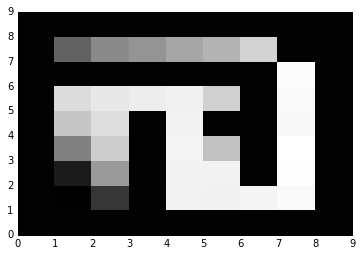

In [51]:
pylab.pcolor(controller.params.reshape(81,4).max(1).reshape(9,9))
pylab.draw()

In [34]:
controller.params.reshape(81,4).max(axis=1)

array([  1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   8.65939899,   8.73749882,
         1.        ,   9.77374404,   9.88270944,  10.09285186,
        10.21756429,   1.        ,   1.        ,   8.76500478,
         8.91170058,   1.        ,   9.70972738,   9.7687448 ,
         1.        ,  10.25264508,   1.        ,   1.        ,
         8.8497466 ,   9.06883883,   1.        ,   9.65546947,
         9.60614277,   1.        ,  10.30624547,   1.        ,
         1.        ,   9.01400833,   9.17879828,   1.        ,
         9.58541206,   1.        ,   1.        ,  10.53047154,
         1.        ,   1.        ,   9.1684935 ,   9.25625894,
         9.37970686,   9.49374237,   9.32688392,   1.        ,
        10.82742339,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,  10.0341828 ,   1.        ,   1.  

In [14]:
print environment

#########
#      *#
####### #
#     #@#
#  # ## #
#  #  # #
#  #  # #
#  #    #
#########



In [56]:
agent.learn()

In [58]:
agent.getAction()

AssertionError: 

In [64]:
controller.params.reshape(9,9,4).round(2)[5,5,:]

array([ 0.92,  0.92,  0.93,  7.55])